In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import numpy as np
import json
import statistics

In [2]:
import matplotlib.font_manager as font_manager
# font_manager._rebuild()

In [3]:
import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [4]:
def load_data(alg, varia, ue, mec, fea, lop, metric):   
    if alg != 'alg-1':
        if metric== 0 : #tot
            file_path = "Simulation/"+ varia +"/" + alg + "_tot_T"+ str(ue) \
                    + "_M" + str(mec)+ "_F" + str(fea)+"_" + str(lop) +".txt"
            for line in open(file_path, 'r'):
                X = [float(s) for s in line.split()]
        elif metric == 1: #comp
            file_path = "Simulation/"+ varia +"/" + alg + "_comp_T"+ str(ue) \
                    + "_M" + str(mec)+ "_F" + str(fea)+ "_" + str(lop) +".txt"
            for line in open(file_path, 'r'):
                X = [float(s) for s in line.split()]
        elif metric == 2: #comm
            file_path = "Simulation/"+ varia +"/" + alg + "_comm_T"+ str(ue) \
                    + "_M" + str(mec)+ "_F" + str(fea)+ "_" + str(lop) +".txt"
            for line in open(file_path, 'r'):
                X = [float(s) for s in line.split()]
        else: #comm
            file_path = "Simulation/"+ varia +"/" + alg + "_sha_T"+ str(ue) \
                    + "_M" + str(mec)+ "_F" + str(fea)+ "_" + str(lop) +".txt"
            for line in open(file_path, 'r'):
                X = [float(s) for s in line.split()]
        return X

In [11]:
def plot_picture(Pro, DS, PCA, PCA_m, EDM_m, k, x_label, y_label, x_range, y_range, x_data, y_data, ue, mec, fea, flag, ALG1=0):
    # picture size
    plt.figure(figsize=(6, 4))
    # legend columns
    col = 3
    
    plt.plot(Pro, "p-", color='black', lw=1, label='MSFS', clip_on=False, markerfacecolor='none', markersize=10)
#     plt.plot(DS, "x-", color='black', lw=1, label='DS', clip_on=False, markerfacecolor='none', markersize=10)
#     plt.plot(PCA, "o-", color='black', lw=1, label='PCA', clip_on=False, markerfacecolor='none', markersize=10)
    plt.plot(PCA_m, "D", color='black', lw=1, label='FFS+multicast', clip_on=False, markerfacecolor='none', markersize=10, linestyle=':')
    plt.plot(EDM_m, "^-", color='black', lw=1, label='U-DeepSC', clip_on=False, markerfacecolor='none', markersize=10)
    
    # picture legend(圖例)
    plt.legend(loc=5, bbox_to_anchor=(0.5, 0.6), prop={'size': '24', 'family': 'Times New Roman'}, labelspacing=0)
    leg = plt.legend(loc=10, bbox_to_anchor=(0.5, 1.2), prop={'size': '24', 'family': 'Times New Roman'},
                   frameon='False', labelspacing=0, handletextpad=0.2, handlelength=1, columnspacing=0.5, ncol=col,
                   facecolor='None')
    leg.get_frame().set_linewidth(0.0)
    
    # set x axis range
    plt.xticks(x_range, x_data)
    plt.xticks(fontsize=24, family="Times New Roman")

    # set y axis range
    plt.yticks(y_range, y_data)
    plt.yticks(fontsize=24, family="Times New Roman")
    
    plt.ylabel(y_label, fontsize=26, family="Times New Roman")
    plt.xlabel(x_label, fontsize=26, family="Times New Roman")
    
    # set x axis limit
    # plt.xlim(150, 350)
    
    plt.tight_layout()
    
    
    if flag == 0:
        y_name = 'tot'
    elif flag == 1:
        y_name = 'comp'
    elif flag == 2:
        y_name = 'comm'
    elif flag == 3:
        y_name = 'sha'
        
    if x_label == 'Number of Users':
        x_name = 'u'
    elif x_label == 'Number of Features':
        x_name = 'f'
    else:
        x_name = x_label
    
    # save picture
#     loc = x_name + "_" + y_name + "_" + k + "_T" + str(ue) + "_M" + str(mec) + "_F" + str(fea) +".pdf"
#     savefig("Simulation/"+loc, bbox_inches='tight')
    
    plt.show()

In [12]:
alg_list = ['Pro', 'DS', 'PCA', 'PCA_m', 'EDM_m','alg-1']

## Number of users

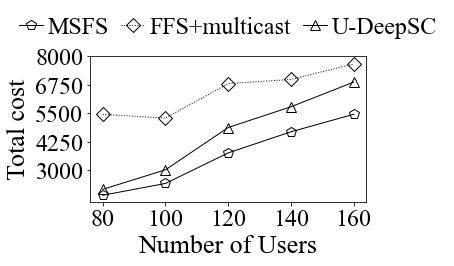

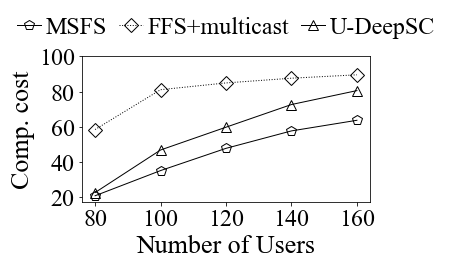

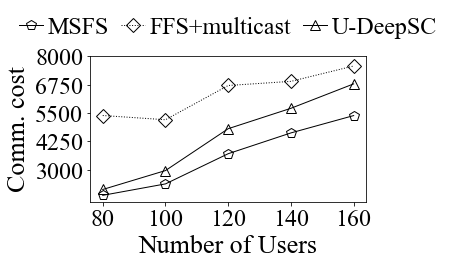

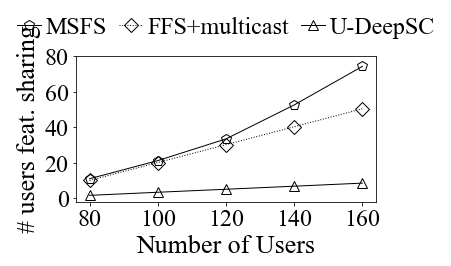

In [13]:
# Uni Deployment
user_range = np.arange(0, 5,step=1)
data = ('80', '100', '120', '140','160')

yrange = np.arange(3000, 8001, step= 1250)
ydata = ('3000', '4250', '5500', '6750', '8000')

#Total cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'user_num_uni', 100, 5, 100, 4, 0)

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Users", "Total cost", user_range, yrange, data, ydata, 100, 5, 100, 0)

yrange = np.arange(20, 101, step=20)
ydata = ('20', '40', '60', '80', '100')

#Computation cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'user_num_uni', 100, 5, 100, 4, 1)
yrange = np.arange(20, 101, step=20)
ydata = ('20', '40', '60', '80', '100')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Users", "Comp. cost", user_range, yrange, data, ydata, 100, 5, 100, 1)

#Communication cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'user_num_uni', 100, 5, 100, 4, 2)
yrange = np.arange(3000, 8001, step= 1250)
ydata = ('3000', '4250', '5500', '6750', '8000')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Users", "Comm. cost", user_range, yrange, data, ydata, 100, 5, 100, 2)

#Shared feature
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'user_num_uni', 100, 5, 100, 4, 3)
yrange = np.arange(0, 81, step= 20)
ydata = ('0', '20', '40', '60', '80')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Users", "# users feat. sharing", user_range, yrange, data, ydata, 100, 5, 100, 3)

#The number of people the feature is shared with

## Number of features

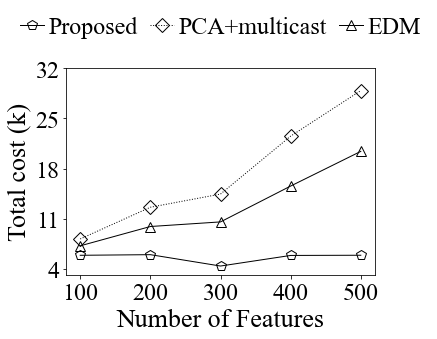

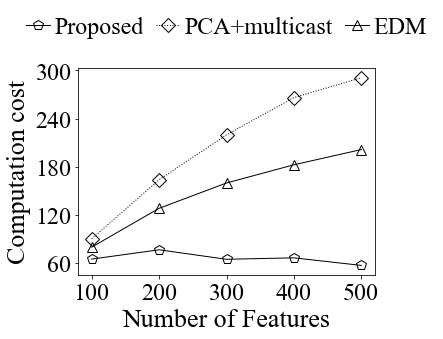

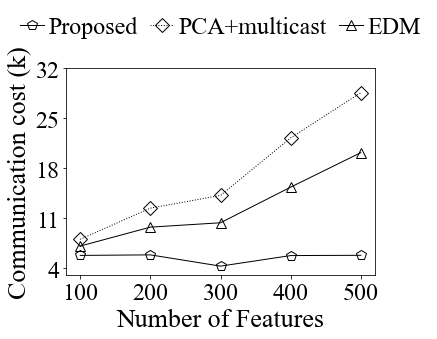

In [9]:
# Uni Deployment
user_range = np.arange(0, 5,step=1)
data = ('100', '200', '300', '400','500')

yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

#Total cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni', 100, 5, 500, 2, 0)

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Total cost (k)", user_range, yrange, data, ydata, 100, 5, 500, 0)

#Computation cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni', 100, 5, 500, 2, 1)
yrange = np.arange(60, 301, step=60)
ydata = ('60', '120', '180', '240', '300')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Computation cost", user_range, yrange, data, ydata, 100, 5, 500, 1)

#Communication cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni', 100, 5, 500, 2, 2)
yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Communication cost (k)", user_range, yrange, data, ydata, 100, 5, 500, 2)


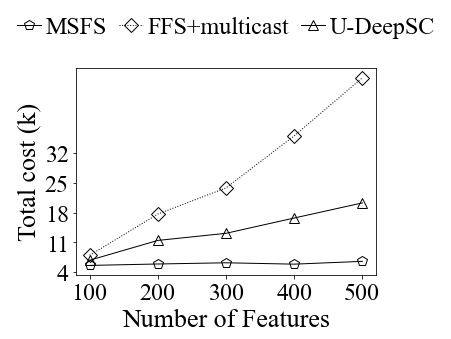

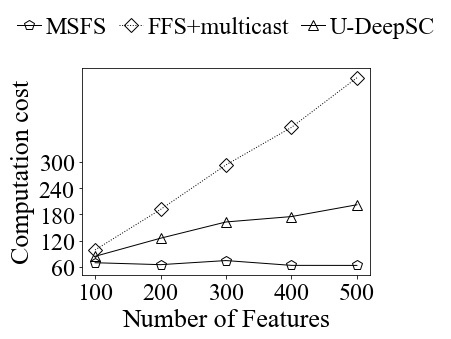

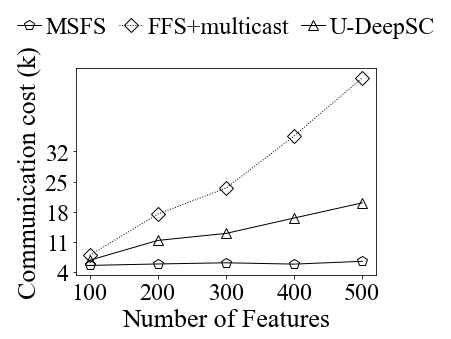

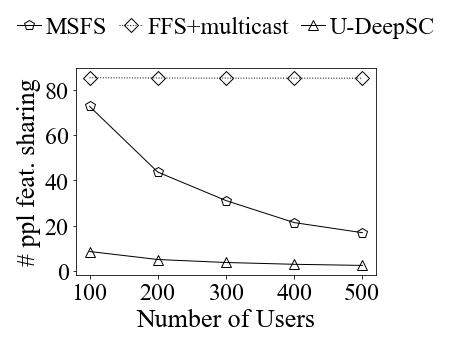

In [44]:
# Uni Deployment
user_range = np.arange(0, 5,step=1)
data = ('100', '200', '300', '400','500')

yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

#Total cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni_2', 100, 5, 500, 2, 0)

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Total cost (k)", user_range, yrange, data, ydata, 100, 5, 500, 0)

#Computation cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni_2', 100, 5, 500, 2, 1)
yrange = np.arange(60, 301, step=60)
ydata = ('60', '120', '180', '240', '300')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Computation cost", user_range, yrange, data, ydata, 100, 5, 500, 1)

#Communication cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni_2', 100, 5, 500, 2, 2)
yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Communication cost (k)", user_range, yrange, data, ydata, 100, 5, 500, 2)

#Shared feature
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, 'feature_num_uni_2', 100, 5, 500, 2, 3)
yrange = np.arange(0, 81, step= 20)
ydata = ('0', '20', '40', '60', '80')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "# users feat. sharing", user_range, yrange, data, ydata, 100, 5, 500, 3)

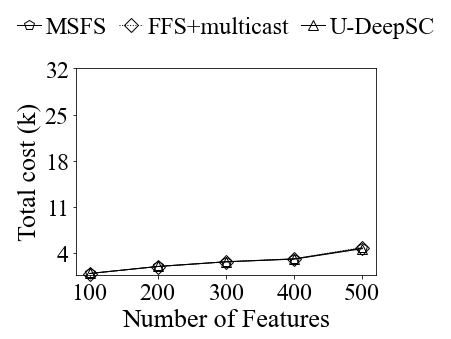

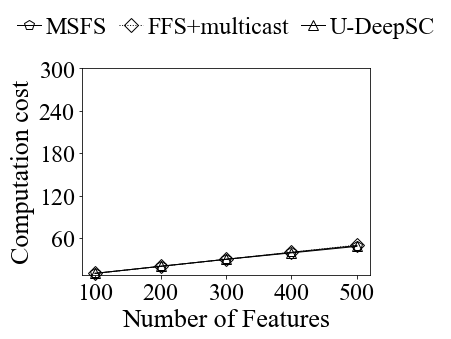

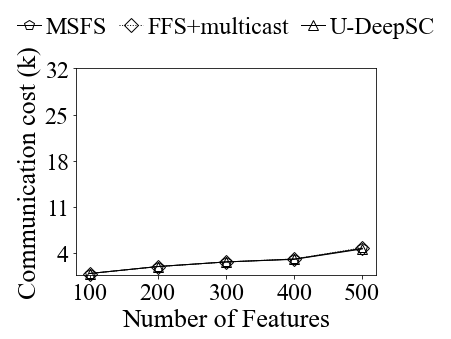

FileNotFoundError: [Errno 2] No such file or directory: 'Simulation/remote/PCA_sha_T100_M5_F50_2.txt'

In [48]:
# Uni Deployment

path = 'remote'
T = 100
M = 5
F= 50
lop = 2

user_range = np.arange(0, 5,step=1)
data = ('100', '200', '300', '400','500')

yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

#Total cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, path, T, M, F, lop, 0)

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Total cost (k)", user_range, yrange, data, ydata, T, M, F, 0)

#Computation cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, path, T, M, F, lop, 1)
yrange = np.arange(60, 301, step=60)
ydata = ('60', '120', '180', '240', '300')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Computation cost", user_range, yrange, data, ydata, T, M, F, 1)

#Communication cost
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, path, T, M, F, lop, 2)
yrange = np.arange(4000, 32001, step= 7000)
ydata = ('4', '11', '18', '25', '32')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "Communication cost (k)", user_range, yrange, data, ydata, 100, 5, 250, 2)

#Shared feature
for alg in alg_list[:-1]:
    locals()['{}_user'.format(alg)] = load_data(alg, path, T, M, F, lop, 3)
yrange = np.arange(0, 81, step= 20)
ydata = ('0', '20', '40', '60', '80')

plot_picture(locals()['Pro_user'], locals()['DS_user'], 
             locals()['PCA_user'],locals()['PCA_m_user'],
             locals()['EDM_m_user'],
             'u', "Number of Features", "# users feat. sharing", user_range, yrange, data, ydata, T, M, F, 3)